In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn
from sklearn import datasets


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_train_insurance.csv to data_train_insurance (1).csv
Saving data_type.csv to data_type (1).csv


# Exploration et pre-processing des données

In [3]:
df_type = pd.read_csv('data_type.csv', sep=';')
variable_types = dict(zip(df_type.VarName, df_type.Type))
df = pd.read_csv('data_train_insurance.csv', sep=';', dtype=variable_types, na_values='?')
df = df.drop(['Id'], axis=1)
df.head()

,Response_Market_Index,PROD_Formula,PER_sex,PER_Sex_Second_Driver,VEH_Actual_Value,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,CLA_BM_TPL_DECLARED,BEH_Mileage,PER_KIDS_ON_BOARD_ID,VEH_Number_of_doors,VEH_Top_Speed,BEH_Number_Year_Insured,VEH_TransmissionId,PER_Age_Main_Driver,PER_License_Age_Main_Driver,PER_License_Age_Second_Driver,PER_Matrimonial_Status,VEH_Age,VEH_Injection_Mode,VEH_fuel_type,BEH_vehicule_usage,VEH_Drive_type,VEH_Body,VEH_Segment,PER_Parking_Type,CLA_BM,VEH_engine_HP,VEH_pw_proportion,VEH_High_Risk_Vehicle,PER_previous_insurer,PER_Is_second_driver,PER_Age_oldest_child,PER_Second_Driver_Age,PER_Insured_Before,VEH_Weight,GEO_Lat,GEO_Long
0,435.0,BASIC,2,0,4600.0,1.0,1.0,1.0,1.0,13.0,3,4.0,160.0,10.0,7,59.0,31.0,-1.0,2,15.0,389999,1,1,50001,9,30003,3,10.0,90.0,59.0,2,5,1,-99.0,-1.0,2,1125.0,-1.790876,-0.431147
1,609.0,FULL,1,0,68315.0,1.0,1.0,1.0,2.0,15.0,1,5.0,248.0,6.0,7,32.0,15.0,-1.0,2,3.0,380002,1,1,50002,9,30005,1,6.0,218.0,106.0,2,17,1,2.0,-1.0,2,1510.0,1.675824,-4.431147
2,609.0,FULL,1,0,68315.0,1.0,1.0,1.0,2.0,15.0,1,5.0,248.0,6.0,7,32.0,15.0,-1.0,2,3.0,380002,1,1,50002,9,30005,1,6.0,218.0,106.0,2,17,1,2.0,-1.0,2,1510.0,1.675824,-4.431147
3,404.0,FULL,1,2,11005.0,1.0,1.0,1.0,2.0,14.0,1,5.0,173.0,7.0,7,31.0,7.0,12.0,2,8.0,380002,1,1,50001,9,30002,3,7.0,80.0,51.0,2,6,2,1.0,31.0,2,1170.0,-0.440876,1.285553
4,404.0,FULL,1,2,11005.0,1.0,1.0,1.0,2.0,14.0,1,5.0,173.0,7.0,7,31.0,7.0,12.0,2,8.0,380002,1,1,50001,9,30002,3,7.0,80.0,51.0,2,6,2,1.0,31.0,2,1170.0,-0.440876,1.285553


In [4]:
df.columns

Index(['Response_Market_Index', 'PROD_Formula', 'PER_sex',
       'PER_Sex_Second_Driver', 'VEH_Actual_Value', 'CLA_HISTORY',
       'CLA_HISTORY_1Y', 'CLA_HISTORY_3Y', 'CLA_BM_TPL_DECLARED',
       'BEH_Mileage', 'PER_KIDS_ON_BOARD_ID', 'VEH_Number_of_doors',
       'VEH_Top_Speed', 'BEH_Number_Year_Insured', 'VEH_TransmissionId',
       'PER_Age_Main_Driver', 'PER_License_Age_Main_Driver',
       'PER_License_Age_Second_Driver', 'PER_Matrimonial_Status', 'VEH_Age',
       'VEH_Injection_Mode', 'VEH_fuel_type', 'BEH_vehicule_usage',
       'VEH_Drive_type', 'VEH_Body', 'VEH_Segment', 'PER_Parking_Type',
       'CLA_BM', 'VEH_engine_HP', 'VEH_pw_proportion', 'VEH_High_Risk_Vehicle',
       'PER_previous_insurer', 'PER_Is_second_driver', 'PER_Age_oldest_child',
       'PER_Second_Driver_Age', 'PER_Insured_Before', 'VEH_Weight', 'GEO_Lat',
       'GEO_Long'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)

In [6]:
train.dtypes

Response_Market_Index            float64
PROD_Formula                      object
PER_sex                           object
PER_Sex_Second_Driver             object
VEH_Actual_Value                 float64
CLA_HISTORY                      float64
CLA_HISTORY_1Y                   float64
CLA_HISTORY_3Y                   float64
CLA_BM_TPL_DECLARED              float64
BEH_Mileage                      float64
PER_KIDS_ON_BOARD_ID              object
VEH_Number_of_doors              float64
VEH_Top_Speed                    float64
BEH_Number_Year_Insured          float64
VEH_TransmissionId                object
PER_Age_Main_Driver              float64
PER_License_Age_Main_Driver      float64
PER_License_Age_Second_Driver    float64
PER_Matrimonial_Status            object
VEH_Age                          float64
VEH_Injection_Mode                object
VEH_fuel_type                     object
BEH_vehicule_usage                object
VEH_Drive_type                    object
VEH_Body        

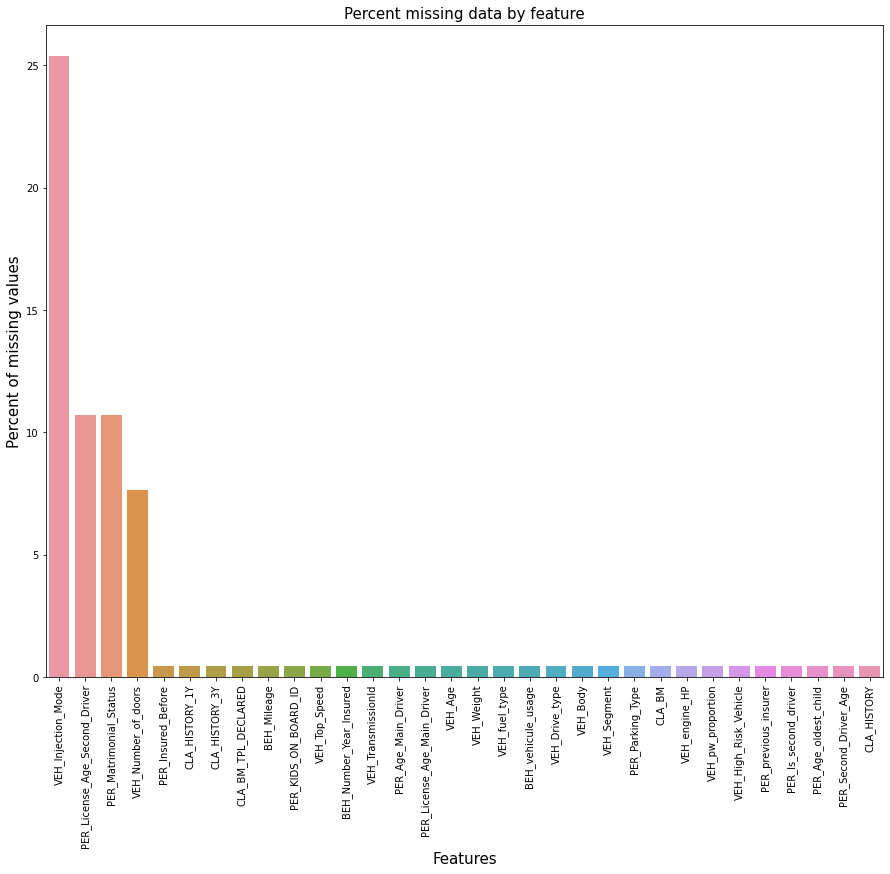

In [7]:
def missing_values_vizu(df):
    missing_by_col=df.isnull().sum()
    col_with_na=missing_by_col[missing_by_col>0]
    percent_missing=(col_with_na/len(df))*100
    percent_missing=percent_missing.sort_values(ascending=False)
    
    plt.figure(1, figsize=(15, 12))
    sns.barplot(x=percent_missing.index,y=percent_missing)

    plt.xticks(rotation='90')
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)

missing_values_vizu(train)

In [8]:
def imputeNA(df):
    #columns with missigns values
    cols_with_missings=[col for col in df.columns if df[col].isnull().any()]
    #numericals and categorials columns with missings values
    cols_num_with_missings=[col for col in df.loc[:,cols_with_missings].columns
                        if df[col].dtypes=='float64' or df[col].dtypes=='int64']
    cols_cat_with_missings=[col for col in df.loc[:,cols_with_missings].columns
                        if df[col].dtypes=='object']
    
    cat_subset=df.loc[:,cols_cat_with_missings]
    num_subset=df.loc[:,cols_num_with_missings]
    
    #mode imputationfor categorial columns
    for cat_col in cat_subset.columns:
        df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)
        
    #mean imputaion in the numerical columns
    for col in num_subset.columns:
        df[col].fillna(df[col].mean(),inplace=True)
        
    return df
  
train = imputeNA(train)
test = imputeNA(test)
train.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Response_Market_Index            0
PROD_Formula                     0
PER_sex                          0
PER_Sex_Second_Driver            0
VEH_Actual_Value                 0
CLA_HISTORY                      0
CLA_HISTORY_1Y                   0
CLA_HISTORY_3Y                   0
CLA_BM_TPL_DECLARED              0
BEH_Mileage                      0
PER_KIDS_ON_BOARD_ID             0
VEH_Number_of_doors              0
VEH_Top_Speed                    0
BEH_Number_Year_Insured          0
VEH_TransmissionId               0
PER_Age_Main_Driver              0
PER_License_Age_Main_Driver      0
PER_License_Age_Second_Driver    0
PER_Matrimonial_Status           0
VEH_Age                          0
VEH_Injection_Mode               0
VEH_fuel_type                    0
BEH_vehicule_usage               0
VEH_Drive_type                   0
VEH_Body                         0
VEH_Segment                      0
PER_Parking_Type                 0
CLA_BM                           0
VEH_engine_HP       

**Distribution de la Target**

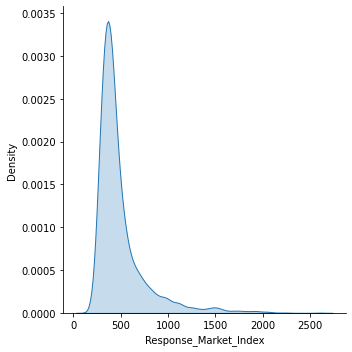

In [9]:
sns.displot(train,x = "Response_Market_Index", kind = "kde" , fill = True )

**Correlation**

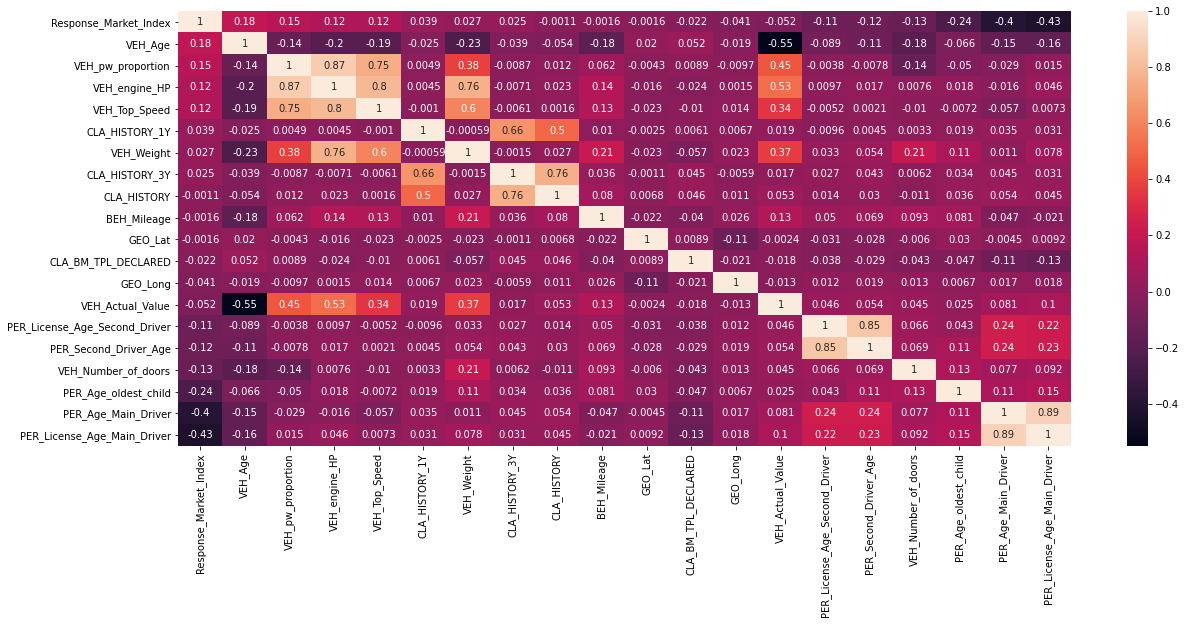

In [10]:
label_float=[col for col in train.columns if train[col].dtypes=='float64']
train_float=train.loc[:,label_float]

def plot_corrMatrix(df,Nvariable,target):
  corr=df.corr()
  cols = corr.nlargest(Nvariable, target)[target].index
  cm = np.corrcoef(df[cols].values.T)
  sns.heatmap(cm,annot=True,yticklabels=cols.values,xticklabels=cols.values)
  

plt.figure(1, figsize=(20, 8))
plot_corrMatrix(train_float,20,"Response_Market_Index")

Categorial variable


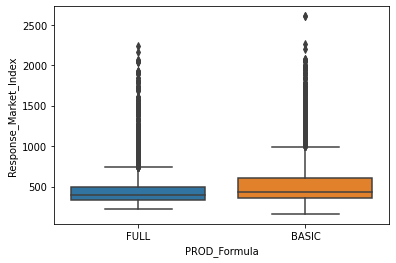

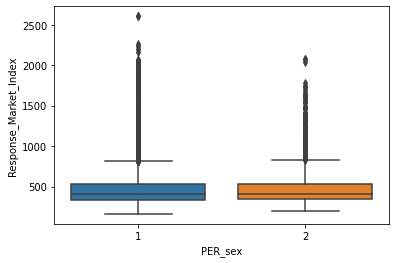

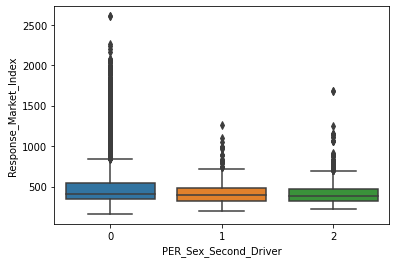

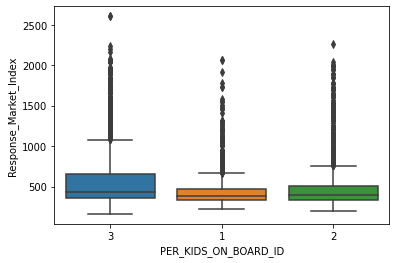

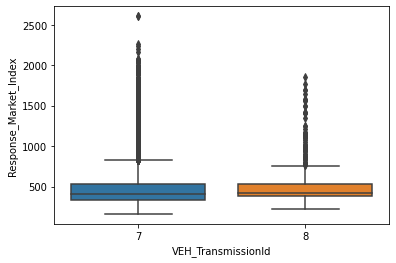

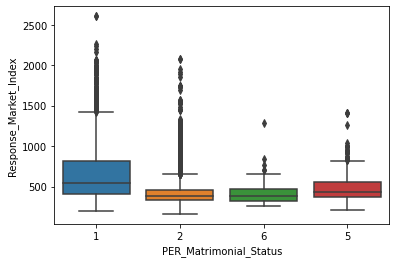

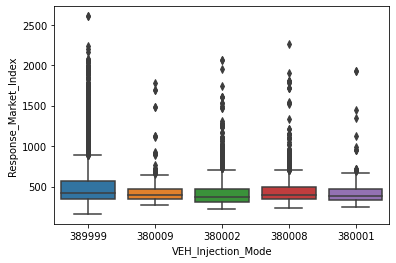

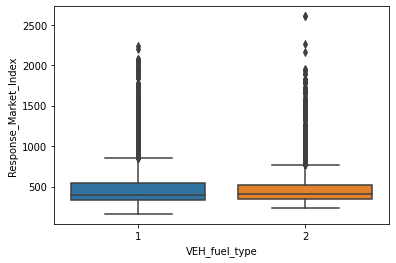

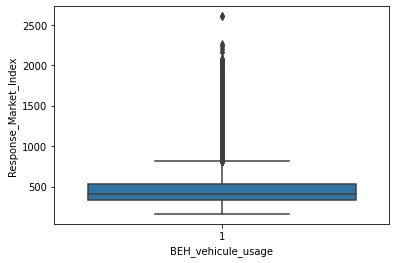

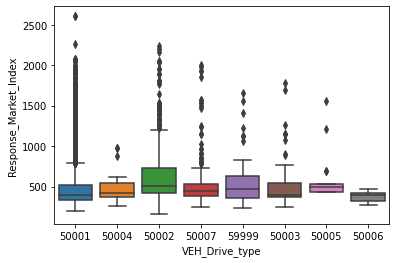

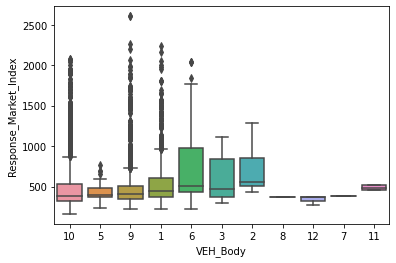

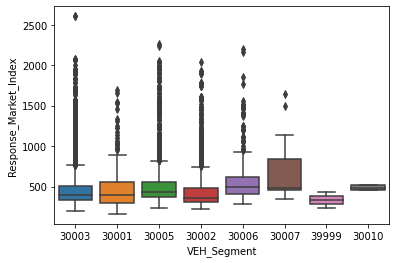

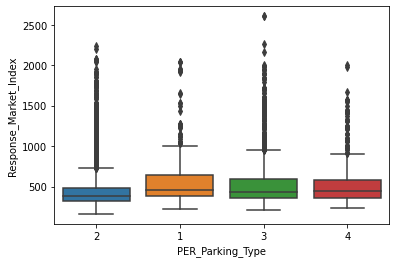

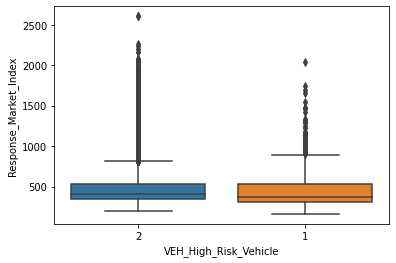

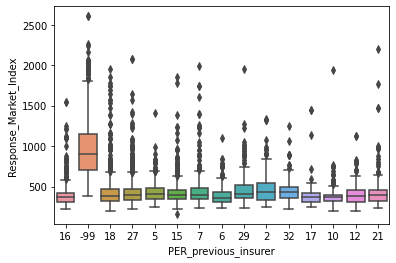

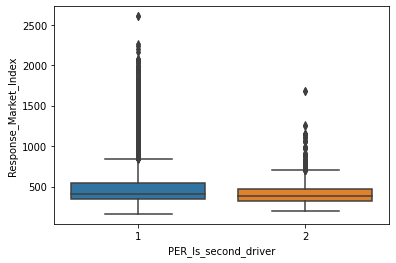

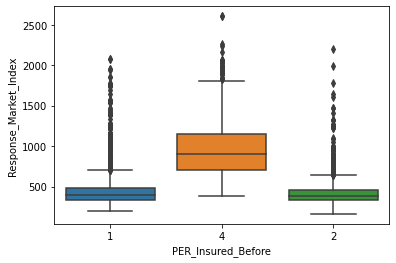

Numerical variable


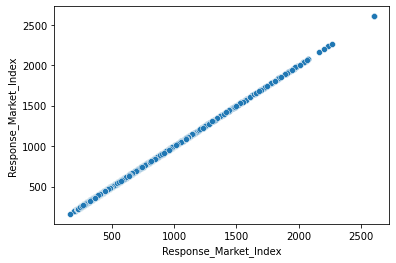

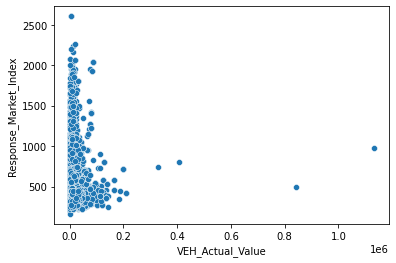

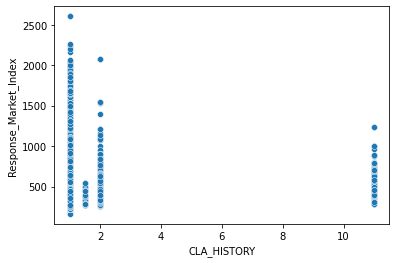

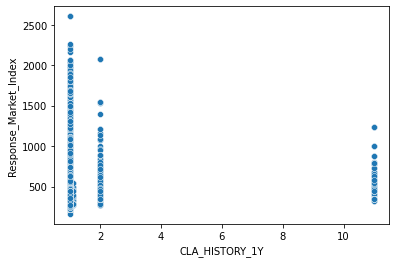

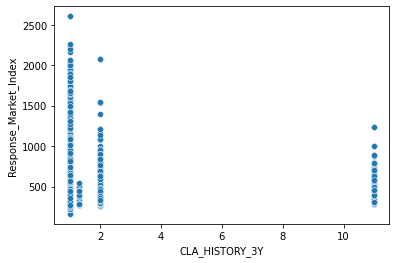

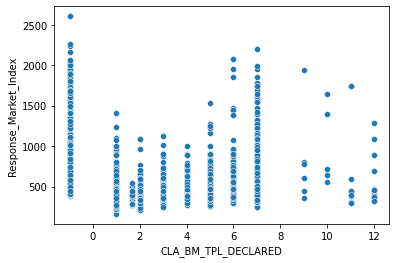

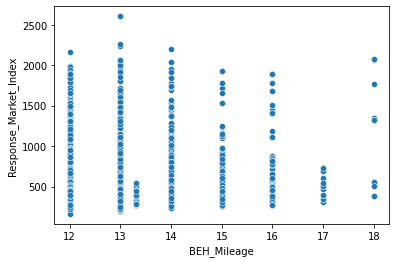

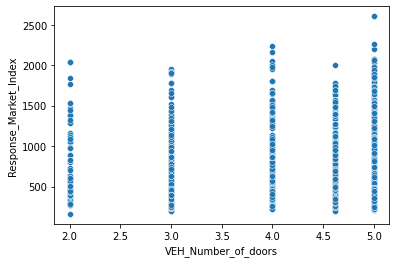

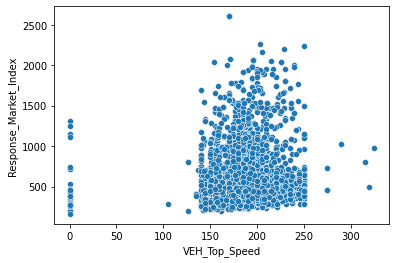

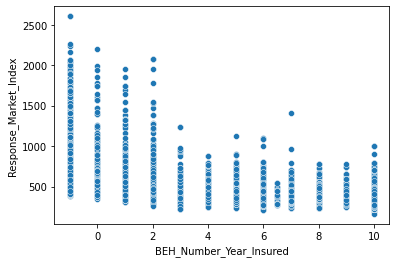

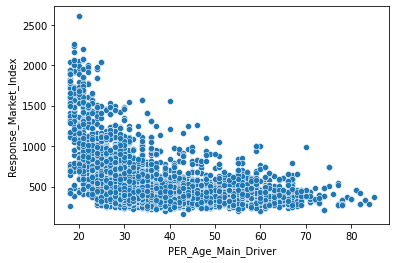

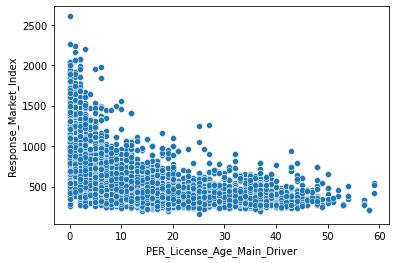

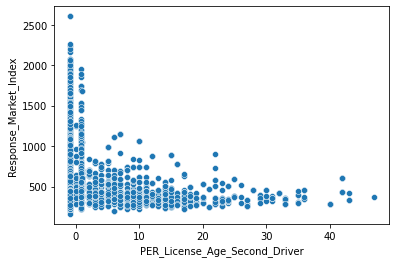

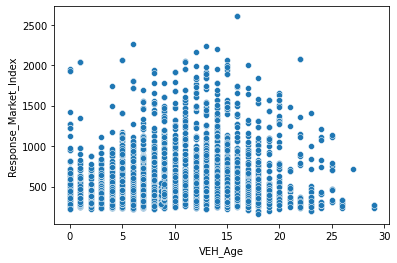

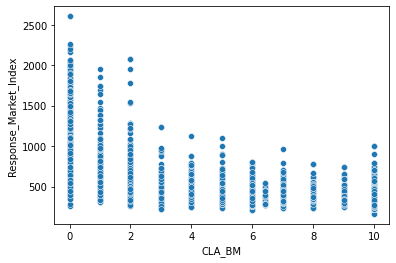

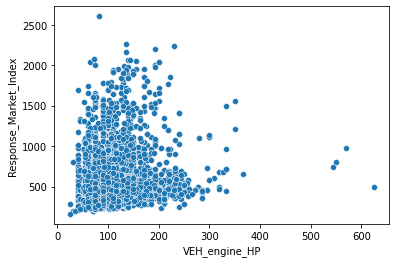

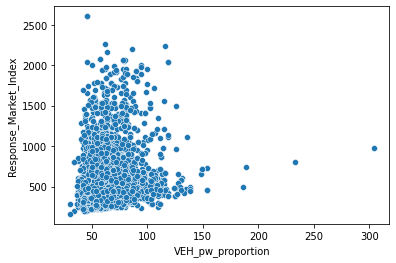

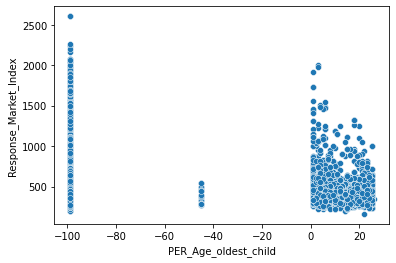

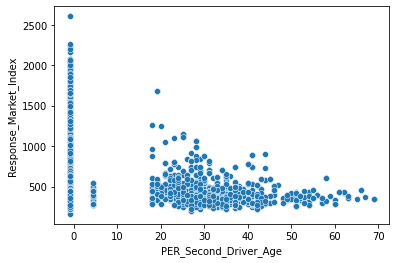

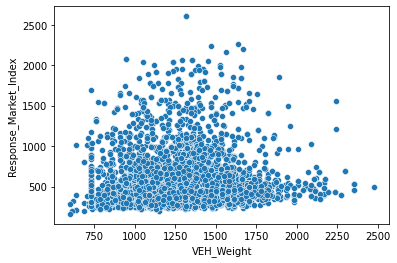

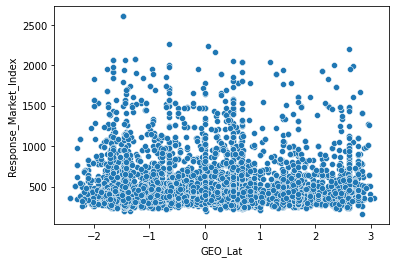

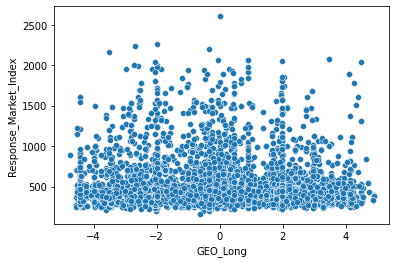

In [11]:
def Bivariate_vizu_reg(df,target):

    print("Categorial variable")
    label_object=[col for col in train.columns if train[col].dtypes=='object']
    for col in label_object:
      
      sns.boxplot(data = train, x = col, y = target)
      plt.show()

    print("Numerical variable")
    label_num=[col for col in train.columns if train[col].dtypes=='float64']
    for col in label_num:
      
      sns.scatterplot(data = train, x = col, y = target )
      plt.show()

Bivariate_vizu_reg(train,'Response_Market_Index')

In [12]:
def OneHotEncod(df,cols):
    for col in cols:
        dummy=pd.get_dummies(df[col],prefix=col) # dataFrame of dummies for each modality of the variable
        df=df.drop(col,axis=1) #drop the former variable
        df=pd.concat([df,dummy],axis=1) #put the dummies in the dataFrame
    return df

In [13]:
train = train.replace(to_replace=["BASIC","FULL"],value=[0,1])
test = test.replace(to_replace=["BASIC","FULL"],value=[0,1])



In [14]:
train_index = train.index
test_index = test.index
all = pd.concat([train,test],axis=0).reset_index()
all.head()


,index,Response_Market_Index,PROD_Formula,PER_sex,PER_Sex_Second_Driver,VEH_Actual_Value,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,CLA_BM_TPL_DECLARED,BEH_Mileage,PER_KIDS_ON_BOARD_ID,VEH_Number_of_doors,VEH_Top_Speed,BEH_Number_Year_Insured,VEH_TransmissionId,PER_Age_Main_Driver,PER_License_Age_Main_Driver,PER_License_Age_Second_Driver,PER_Matrimonial_Status,VEH_Age,VEH_Injection_Mode,VEH_fuel_type,BEH_vehicule_usage,VEH_Drive_type,VEH_Body,VEH_Segment,PER_Parking_Type,CLA_BM,VEH_engine_HP,VEH_pw_proportion,VEH_High_Risk_Vehicle,PER_previous_insurer,PER_Is_second_driver,PER_Age_oldest_child,PER_Second_Driver_Age,PER_Insured_Before,VEH_Weight,GEO_Lat,GEO_Long
0,9857,309.00,1,1,0,6985.0,1.0,1.0,1.0,1.0,13.0,3,3.000000,202.0,8.0,7,31.0,8.0,-1.0,1,12.0,389999,1,1,50001,10,30003,2,8.0,133.0,80.0,2,16,1,-99.0,-1.0,1,1240.0,-0.074676,-2.929947
1,6474,382.84,0,1,1,1900.0,1.0,1.0,1.0,-1.0,14.0,3,4.617898,175.0,-1.0,7,64.0,48.0,6.0,2,18.0,389999,1,1,50001,10,30003,2,0.0,75.0,53.0,2,-99,2,25.0,24.0,4,1055.0,1.792424,-3.214447
2,8049,283.88,1,1,1,7065.0,1.0,1.0,1.0,1.0,12.0,3,5.000000,150.0,10.0,7,63.0,41.0,6.0,2,11.0,389999,1,1,50001,10,30001,2,10.0,54.0,48.0,1,18,2,25.0,25.0,1,840.0,-1.424176,-1.647747
3,9000,518.00,0,1,0,5400.0,1.0,1.0,1.0,1.0,12.0,1,5.000000,160.0,5.0,7,33.0,5.0,-1.0,2,18.0,389999,2,1,50001,5,30005,2,5.0,90.0,39.0,2,27,1,1.0,-1.0,1,1695.0,1.142424,2.402253
4,8342,553.00,0,1,0,22735.0,1.0,1.0,1.0,1.0,13.0,3,5.000000,201.0,7.0,7,26.0,8.0,-1.0,1,8.0,380009,2,1,50004,9,30005,2,7.0,140.0,67.0,2,5,1,-99.0,-1.0,1,1554.0,-1.657576,0.902253


In [15]:
label_object=[col for col in all.columns if all[col].dtypes=='object']
all = OneHotEncod(all, label_object)

train = all.iloc[train_index]
test = all.iloc[test_index]

In [16]:
train.shape,test.shape

((7986, 99), (1997, 99))

# Modelisation

In [17]:
def trainModels(df_train,target,models_list):
    
    # spilt the dataframe in a train and a validation dataframe
    X_train, X_valid, y_train, y_valid = train_test_split(df_train, target, train_size=0.8, test_size=0.2,
                                                      random_state=42)
    score_list_train=[]
    score_list_valid=[]
    for model in models_list:
        model.fit(X_train,y_train)

        pred_train = model.predict(X_train)
        pred_valid = model.predict(X_valid)

        score_train = mean_absolute_error(pred_train,y_train)
        score_valid = mean_absolute_error(pred_valid,y_valid)

        score_list_train.append(score_train)
        score_list_valid.append(score_valid)

    df_score = {"Train":score_list_train, "Valdation": score_list_valid}
    df_score = pd.DataFrame(data = df_score)

    return df_score

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble  import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

data = train.copy()

target = data.Response_Market_Index
data = data.drop(["Response_Market_Index"],axis=1)
print(data.columns)



from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#from sklearn.linear_model import TweedieRegressor,GammaRegressor
seed = 44

#regression
linReg = LinearRegression()
ridge = Ridge(alpha = 0.5)
lasso = Lasso(alpha = 0.5)
# GamaReg = GammaRegressor(alpha = 0.5)
# ensemblist
Rforest = RandomForestRegressor(n_estimators = 50 , max_depth = 8)
AdaBoost = AdaBoostRegressor(n_estimators = 50)
GradientBoost = GradientBoostingRegressor(n_estimators = 50)




list_m =[linReg,ridge,lasso,Rforest,AdaBoost,GradientBoost]
score = round(trainModels(data,target,list_m),2)
score



Index(['index', 'PROD_Formula', 'VEH_Actual_Value', 'CLA_HISTORY',
       'CLA_HISTORY_1Y', 'CLA_HISTORY_3Y', 'CLA_BM_TPL_DECLARED',
       'BEH_Mileage', 'VEH_Number_of_doors', 'VEH_Top_Speed',
       'BEH_Number_Year_Insured', 'PER_Age_Main_Driver',
       'PER_License_Age_Main_Driver', 'PER_License_Age_Second_Driver',
       'VEH_Age', 'CLA_BM', 'VEH_engine_HP', 'VEH_pw_proportion',
       'PER_Age_oldest_child', 'PER_Second_Driver_Age', 'VEH_Weight',
       'GEO_Lat', 'GEO_Long', 'PER_sex_1', 'PER_sex_2',
       'PER_Sex_Second_Driver_0', 'PER_Sex_Second_Driver_1',
       'PER_Sex_Second_Driver_2', 'PER_KIDS_ON_BOARD_ID_1',
       'PER_KIDS_ON_BOARD_ID_2', 'PER_KIDS_ON_BOARD_ID_3',
       'VEH_TransmissionId_7', 'VEH_TransmissionId_8',
       'PER_Matrimonial_Status_1', 'PER_Matrimonial_Status_2',
       'PER_Matrimonial_Status_5', 'PER_Matrimonial_Status_6',
       'VEH_Injection_Mode_380001', 'VEH_Injection_Mode_380002',
       'VEH_Injection_Mode_380008', 'VEH_Injection_Mode_380

,Train,Valdation
0,102.25,100.88
1,102.25,100.88
2,102.17,100.06
3,60.98,69.10
4,152.07,151.24
5,73.40,75.96


Le random forest a le merilleur résultat, on va maintenant otpimisé les paramétre de ce model

## Validation croisée

In [19]:
from sklearn.model_selection import GridSearchCV

def model_parameters_optimization(df,target,model,parameters_grid,score_type):
    
    grid_search=GridSearchCV(estimator=model,param_grid=parameters_grid,cv=5,n_jobs=-1,scoring=score_type)
    grid_search.fit(df,target)
    best_score=grid_search.best_score_
    best_parameter=grid_search.best_params_
    
    return best_score,best_parameter
    

In [20]:
Rforest = RandomForestRegressor()
random_grid = {'max_depth': [10,20],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators':[50,100,200]}

score,params = model_parameters_optimization(data,target,Rforest,random_grid,'neg_mean_absolute_error')
print(score,params)

-43.391726962477925 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


**On a améliorer la performance du model avec l'optimisation des paramétres**

## Model sur le test 

In [21]:
y_train = train.Response_Market_Index
y_test = test.Response_Market_Index
X_train = train.drop(["Response_Market_Index"],axis=1)
X_test = test.drop(["Response_Market_Index"],axis=1)

print(test.shape,train.shape)


(1997, 99) (7986, 99)


In [22]:
X_test.isna().sum()
X_test = X_test.fillna(0)

In [23]:
X_train.shape,X_test.shape

((7986, 98), (1997, 98))

In [24]:
best_model = RandomForestRegressor(**params)
best_model.fit(X_train,y_train)
best_pred = best_model.predict(X_test)
score_test = mean_absolute_error(best_pred,y_test)

print(score_test)

42.863754129422226


# Interpretation

In [25]:
df_pred = pd.DataFrame(data = best_pred, columns = ['y_pred'])
df_test = X_test.reset_index()
df_ytest = pd.DataFrame(list(y_test), columns = ['y_test'] ) # ligne modifiée
df = pd.concat([df_test, df_ytest, df_pred], axis=1)
df["error"] = np.abs((df["y_test"] - df["y_pred"]) / df["y_test"])
df.head()

print("poucentage d'erreur moyen :",df.error.mean())

poucentage d'erreur moyen : 0.07892939565921801


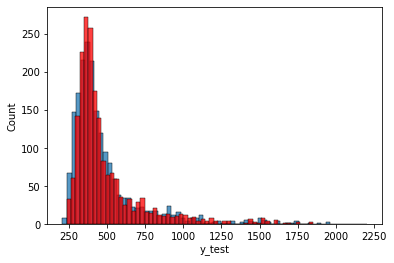

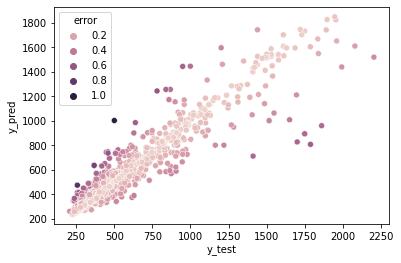

In [26]:
sns.histplot(x="y_test", data = df)
sns.histplot(x = "y_pred", data = df,color = 'red',)
plt.show()


sns.scatterplot(x = "y_test", y = "y_pred", hue= "error", data = df)


**le model est moins précis sur les petites valeurs**

In [27]:
from sklearn.inspection import permutation_importance,plot_partial_dependence


def plot_permu_importance(model,X,y):
  r = permutation_importance(model, X, y,
                            n_repeats=30,
                            random_state=0)
  for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
      print(f"{X.columns[i]:<8}"
                f"{r.importances_mean[i]:.3f}"
                f" +/- {r.importances_std[i]:.3f}")

def plot_partial_dep(model,X):
  features= ["BEH_Number_Year_Insured","PER_License_Age_Main_Driver",("BEH_Number_Year_Insured","PER_License_Age_Main_Driver")]

  fig = plt.figure(figsize = (16,8))
  plot_partial_dependence(model,X,features,fig=fig)

/usr/local/lib/python3.7/dist-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


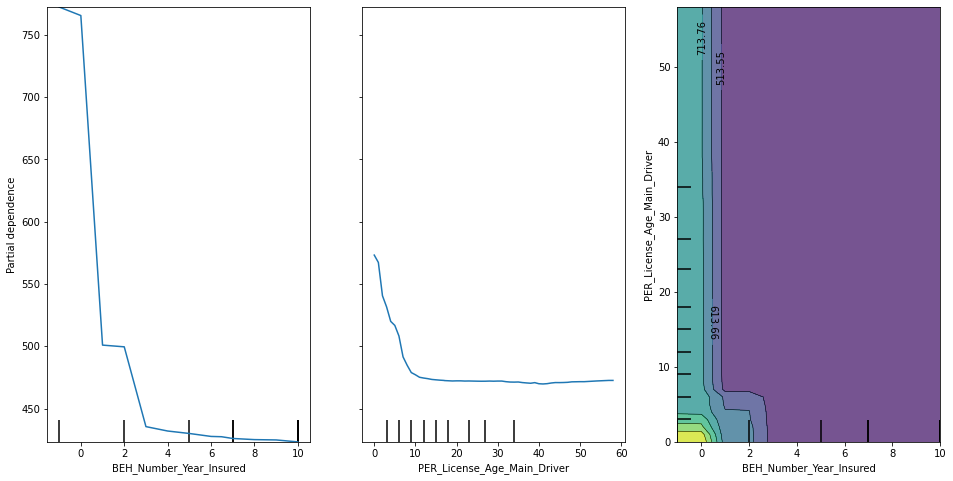

In [28]:
plot_partial_dep(best_model,X_test)
#plot_permu_importance(best_model,X_test,y_test)

In [29]:
X_test.head()

,index,PROD_Formula,VEH_Actual_Value,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,CLA_BM_TPL_DECLARED,BEH_Mileage,VEH_Number_of_doors,VEH_Top_Speed,BEH_Number_Year_Insured,PER_Age_Main_Driver,PER_License_Age_Main_Driver,PER_License_Age_Second_Driver,VEH_Age,CLA_BM,VEH_engine_HP,VEH_pw_proportion,PER_Age_oldest_child,PER_Second_Driver_Age,VEH_Weight,GEO_Lat,GEO_Long,PER_sex_1,PER_sex_2,PER_Sex_Second_Driver_0,PER_Sex_Second_Driver_1,PER_Sex_Second_Driver_2,PER_KIDS_ON_BOARD_ID_1,PER_KIDS_ON_BOARD_ID_2,PER_KIDS_ON_BOARD_ID_3,VEH_TransmissionId_7,VEH_TransmissionId_8,PER_Matrimonial_Status_1,PER_Matrimonial_Status_2,PER_Matrimonial_Status_5,PER_Matrimonial_Status_6,VEH_Injection_Mode_380001,VEH_Injection_Mode_380002,VEH_Injection_Mode_380008,...,VEH_Body_3,VEH_Body_5,VEH_Body_6,VEH_Body_7,VEH_Body_8,VEH_Body_9,VEH_Segment_30001,VEH_Segment_30002,VEH_Segment_30003,VEH_Segment_30005,VEH_Segment_30006,VEH_Segment_30007,VEH_Segment_30010,VEH_Segment_39999,PER_Parking_Type_1,PER_Parking_Type_2,PER_Parking_Type_3,PER_Parking_Type_4,VEH_High_Risk_Vehicle_1,VEH_High_Risk_Vehicle_2,PER_previous_insurer_-99,PER_previous_insurer_10,PER_previous_insurer_12,PER_previous_insurer_15,PER_previous_insurer_16,PER_previous_insurer_17,PER_previous_insurer_18,PER_previous_insurer_2,PER_previous_insurer_21,PER_previous_insurer_27,PER_previous_insurer_29,PER_previous_insurer_32,PER_previous_insurer_5,PER_previous_insurer_6,PER_previous_insurer_7,PER_Is_second_driver_1,PER_Is_second_driver_2,PER_Insured_Before_1,PER_Insured_Before_2,PER_Insured_Before_4
9379,7967,1,28540.0,1.0,1.0,1.0,1.0,14.0,5.0,176.0,9.0,35.0,17.0,-1.0,5.0,9.0,128.0,69.0,5.0,-1.0,1364.0,0.225824,-0.214447,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
9974,8466,0,5700.0,1.0,1.0,1.0,4.0,12.0,3.0,152.0,2.0,27.0,4.0,-1.0,14.0,2.0,50.0,42.0,-99.0,-1.0,883.0,1.242424,-3.964447,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
8988,3043,0,18495.0,2.0,1.0,2.0,1.0,14.0,4.0,175.0,10.0,51.0,31.0,-1.0,6.0,10.0,83.0,55.0,-99.0,-1.0,1117.0,-2.057576,0.202253,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
56,7810,1,22825.0,1.0,1.0,1.0,1.0,13.0,5.0,210.0,7.0,47.0,28.0,-1.0,6.0,7.0,150.0,76.0,-99.0,-1.0,1462.0,-1.440876,-0.047747,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4723,247,0,40867.0,1.0,1.0,1.0,1.0,13.0,5.0,180.0,6.0,30.0,6.0,-1.0,2.0,6.0,95.0,52.0,2.0,-1.0,1362.0,1.392424,4.135553,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0


In [30]:
!pip install shap

In [31]:
import shap

def Compute_Shap(model,X):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(X)
  return shap_values


def plot_oneShap(model,X,row_i):
  # explain the model's predictions using SHAP
  # (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(X)

  # visualize the i prediction's explanation (use matplotlib=True to avoid Javascript)
  shap.force_plot(explainer.expected_value, shap_values[row_i,:], X.iloc[row_i,:], matplotlib=True)


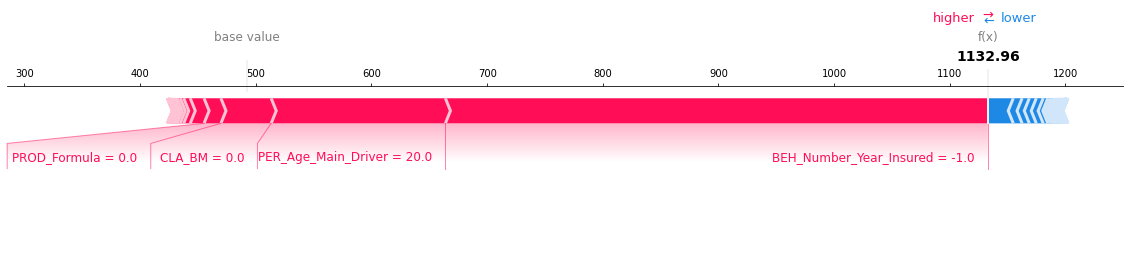

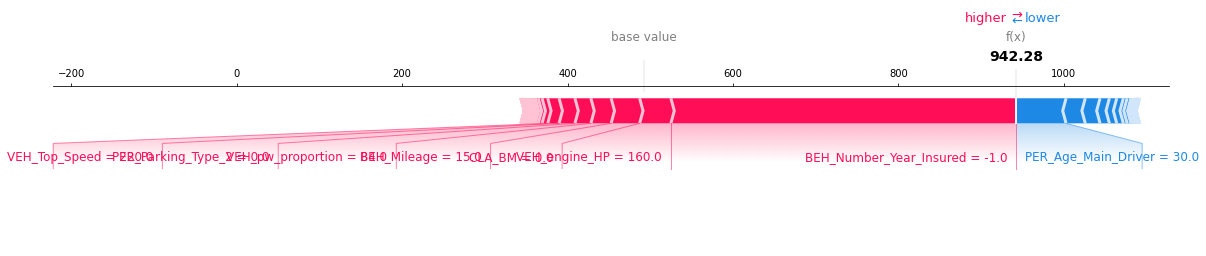

In [32]:
plot_oneShap(best_model,X_test,25)
plot_oneShap(best_model,X_test,127)


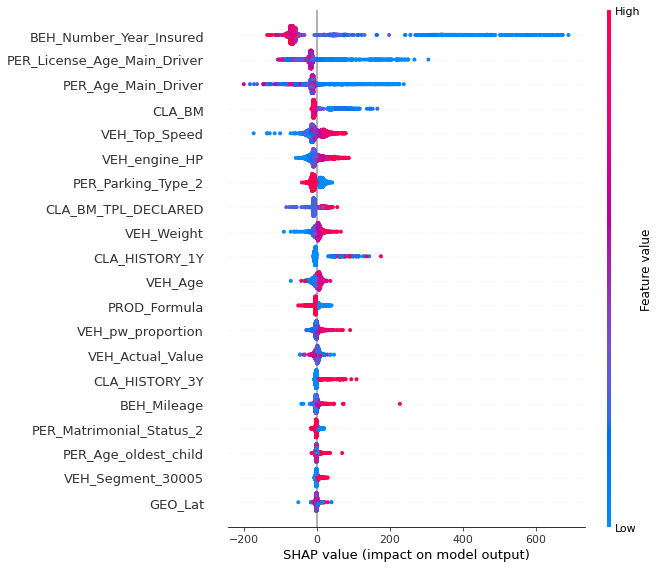

In [33]:
shap_val = Compute_Shap(best_model,X_test)
shap.summary_plot(shap_val, X_test)